O caixeiro com gasolina infinita (e sem consciência ambiental)
========================================



## Introdução



Este experimento é muito semelhante ao experimento A.06, do caixeiro viajante. A diferença, no entanto, é que ao invés de ser um problema de *minimização*, o consideramos um problema de *maximização* - isso significa que queremos encontrar agora o **maior** caminho que percorre $n$ cidades, e não o **menor**.


## Objetivo



**Objetivo**: Encontre o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica.

**Considerações do experimento**: Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
import random
from funcoes import criaCidades 
from funcoes import população_cv as criaPopulaçãoInicial
from funcoes import funçãoObjetivoPopulação_cv  as funçãoObjetivoPopulação
from funcoes import seleçãoTorneioMax as funçãoSeleção
from funcoes import cruzamentoOrdenado as funçãoCruzamento
from funcoes import mutaçãoDeTroca as funçãoMutação
import matplotlib.pyplot as plt

## Códigos e discussão



Antes de dar início à edição do código do código original do caixeiro viajante, vale a pena considerar o que deverá ser modificado e o que deve continuar igual para adaptar o problema;

* **Continua igual:**
    * A função de criação das cidades e maneira de medir a distância deve continuar a mesma, pois não afeta o problema;
    * As funções de criação de indivíduo e população também devem permanecer iguais;
    * A função de cruzamento pode continuar igual;
    * A função de mutação também pode ser a mesma;
    * OBS: Pensei inicialmente que a função objetivo também teria que ser modificada, mas, em realidade, ela apenas computa a distância, portanto também deve permanecer igual.

<br>

* **Deve ser mudado:**
    * A constante do número de cidades $n$ deve agora ser maior ou igual a 7; $\checkmark$
    * A função de seleção deve ser modificada de modo a beneficiar os indivíduos com **maior** distância; $\checkmark$
    * A implementação do hall da fama também precisa considerar essa inversão; $\checkmark$
    * A solução agora deve ser representada graficamente. $\checkmark$

In [2]:
# Constantes:

TAMANHO_POP = 10
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTAÇÃO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

NUM_GERAÇÕES = 15
NUM_CIDADES = 8
CIDADES = criaCidades(NUM_CIDADES)
POSIÇÕES_CIDADES_LISTA = list(CIDADES.values())


In [3]:
# Busca por algoritmo genético:

população = criaPopulaçãoInicial(TAMANHO_POP, CIDADES)

melhor_fitness_já_visto = float("-inf")

for n in range(NUM_GERAÇÕES):
    
    # Seleção
    fitness = funçãoObjetivoPopulação(população,CIDADES)
    população = funçãoSeleção(população, fitness)
    
    # Cruzamento
    pais = população[0::2]
    mães = população[1::2]
    
    contador = 0
    
    for pai, mãe in zip(pais, mães):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funçãoCruzamento(pai, mãe)
            população[contador] = filho1
            população[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(população)):
        if random.random() <= CHANCE_MUTAÇÃO:
            indivíduo = população[n]
            população[n] = funçãoMutação(indivíduo)            
            
    # melhor individuo já visto até agora
    fitness = funçãoObjetivoPopulação(população, CIDADES)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_já_visto:        
        posição = fitness.index(maior_fitness)
        melhor_indivíduo_já_visto = população[posição]
        melhor_fitness_já_visto = maior_fitness

In [4]:
# Checando os resultados:

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_indivíduo_já_visto, "com distância:", melhor_fitness_já_visto)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 6', 'Cidade 5', 'Cidade 1', 'Cidade 4', 'Cidade 3', 'Cidade 2', 'Cidade 7', 'Cidade 0'] com distância: 4.976293143858393


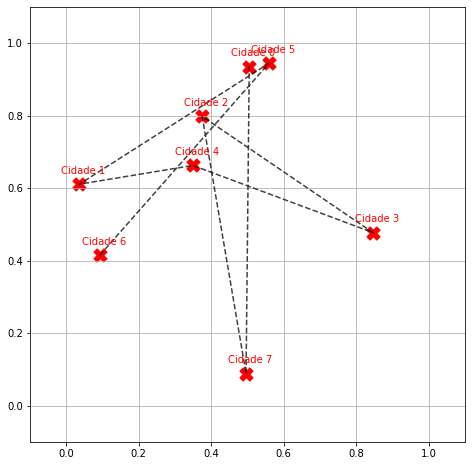

In [5]:
# Visualização gráfica:

# ----- Dados:
x, y = zip(*[CIDADES[i] for i in melhor_indivíduo_já_visto])

# ----- Gráfico
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.1, 1.1)
ax.set_box_aspect(1)
plt.grid()

plt.plot(x, y, 'k--', alpha=.75) # CAMINHO
plt.scatter(x, y, marker='X', s=175, color='r') # CIDADES

for X, Y in zip(x, y):
    ax.text(X-0.05, Y+0.03, melhor_indivíduo_já_visto[x.index(X)], fontsize=10, color='r') # LABEL DAS CIDADES

plt.show()

OBS: optei por não plotar no gráfico o caminho "fechado", como um ciclo infinito, por me preocupar com o meio ambiente e a emissão de gás carbônico - mas entendo que o problema original não funciona desta maneira. ☃

## Conclusão



Apesar de o código ser muito semelhante ao utilizado para o problema original de minimização, é impressionante a maneira como a modificação de apenas alguns sinais (trocas de $\le$ para $\ge$ e de $\infty$ pra $-\infty$, por exemplo) pode mudar tão drasticamente os resultados. A aplicação de algoritmos genéticos para solucionar o problema do caixeiro viajante com gasolina infinita (com o objetivo de maximizar o percurso) é uma abordagem interessante, e, embora a maioria dos estudos se concentre na minimização do caminho, a maximização pode ser útil em algumas aplicações práticas.

## Playground

